In [371]:
import math
from numpy.random import uniform
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [399]:
def generate_y(x_i, var):
    length = len(x_i)
    noise = normal(0, var, length)
    y_i = [math.sin(2*(math.pi)*x_i[i]) for i in range(length)] + noise
    return y_i

In [407]:
noise_var = 0.1
length = 10
x_i = uniform(0, 1, length)
x_i = sorted(x_i)
y_i = generate_y(x_i, noise_var)

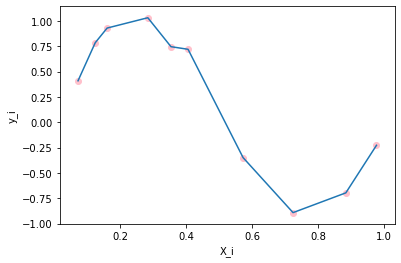

In [408]:
plt.scatter(x_i, y_i, color='pink')
plt.plot(x_i, y_i)
plt.xlabel("X_i")
plt.ylabel("y_i")
plt.savefig("Datapoints.png")

In [409]:
x_test = uniform(0, 1, 100)
x_test = sorted(x_test)

In [410]:
length = 100
y_test = [math.sin(2*(math.pi)*x_test[i]) for i in range(length)] 

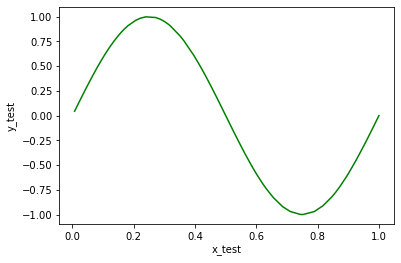

In [411]:
plt.plot(x_test, y_test, color='green')
plt.xlabel("x_test")
plt.ylabel("y_test")
plt.savefig("Test_Points.png")

In [412]:
var = 0.0001
def gaussian_function(x,mean,variance):
  sigma=math.sqrt(variance)
  y=(1/(sigma*math.sqrt(2*np.pi)))*((np.exp([1])[0])**(-0.5*(((x-mean)/sigma)**2)))
  return y

def k(x, x_train, var):
    sigma = math.sqrt(var)
    mean = 0
    kernels = []
    numerator = [gaussian_function((x-x_train[i]), 0, var) for i in range(len(x_train))]
    denominator = sum([gaussian_function((x-x_train[i]), 0, var) for i in range(len(x_train))])
    kernels = numerator/denominator
    return kernels


def get_expectation_and_variance(k, t, sigma):
    expectation = sum([k[i]*t[i] for i in range(len(k))])
    variance = sum([k[i]*(t[i]**2) for i in range(len(k))])
    return expectation, variance+ +(sigma**2)-(expectation**2)



In [413]:

def plot_function(x_train,y_train,x_test,y_predicted,var_list, counter, axs, title):
        x_train = np.array(x_train)
        y_train=np.array(y_train)
        y_predicted = np.array(y_predicted)
        var_list = np.array(var_list)
        up_limit = y_predicted+2*var_list
        low_limit= y_predicted-2*var_list
        y_test = []
        for i in range(len(x_test)):
                y_test.append(np.sin(2*np.pi*x_test[i]))
        x = counter//2
        y = counter%2
        axs[x][y].plot(x_test,y_test,color="green",label='True')
        axs[x][y].plot(x_test,y_predicted,color='red',label='Predicted')
        axs[x][y].fill_between(x_test,up_limit,low_limit, alpha = 0.1, color='blue')
        axs[x][y].set_title(title)
        leg = axs[x][y].legend(loc='upper right', frameon=False)
        if x_train is not None:
                plt.plot(x_train, y_train, 'rx')

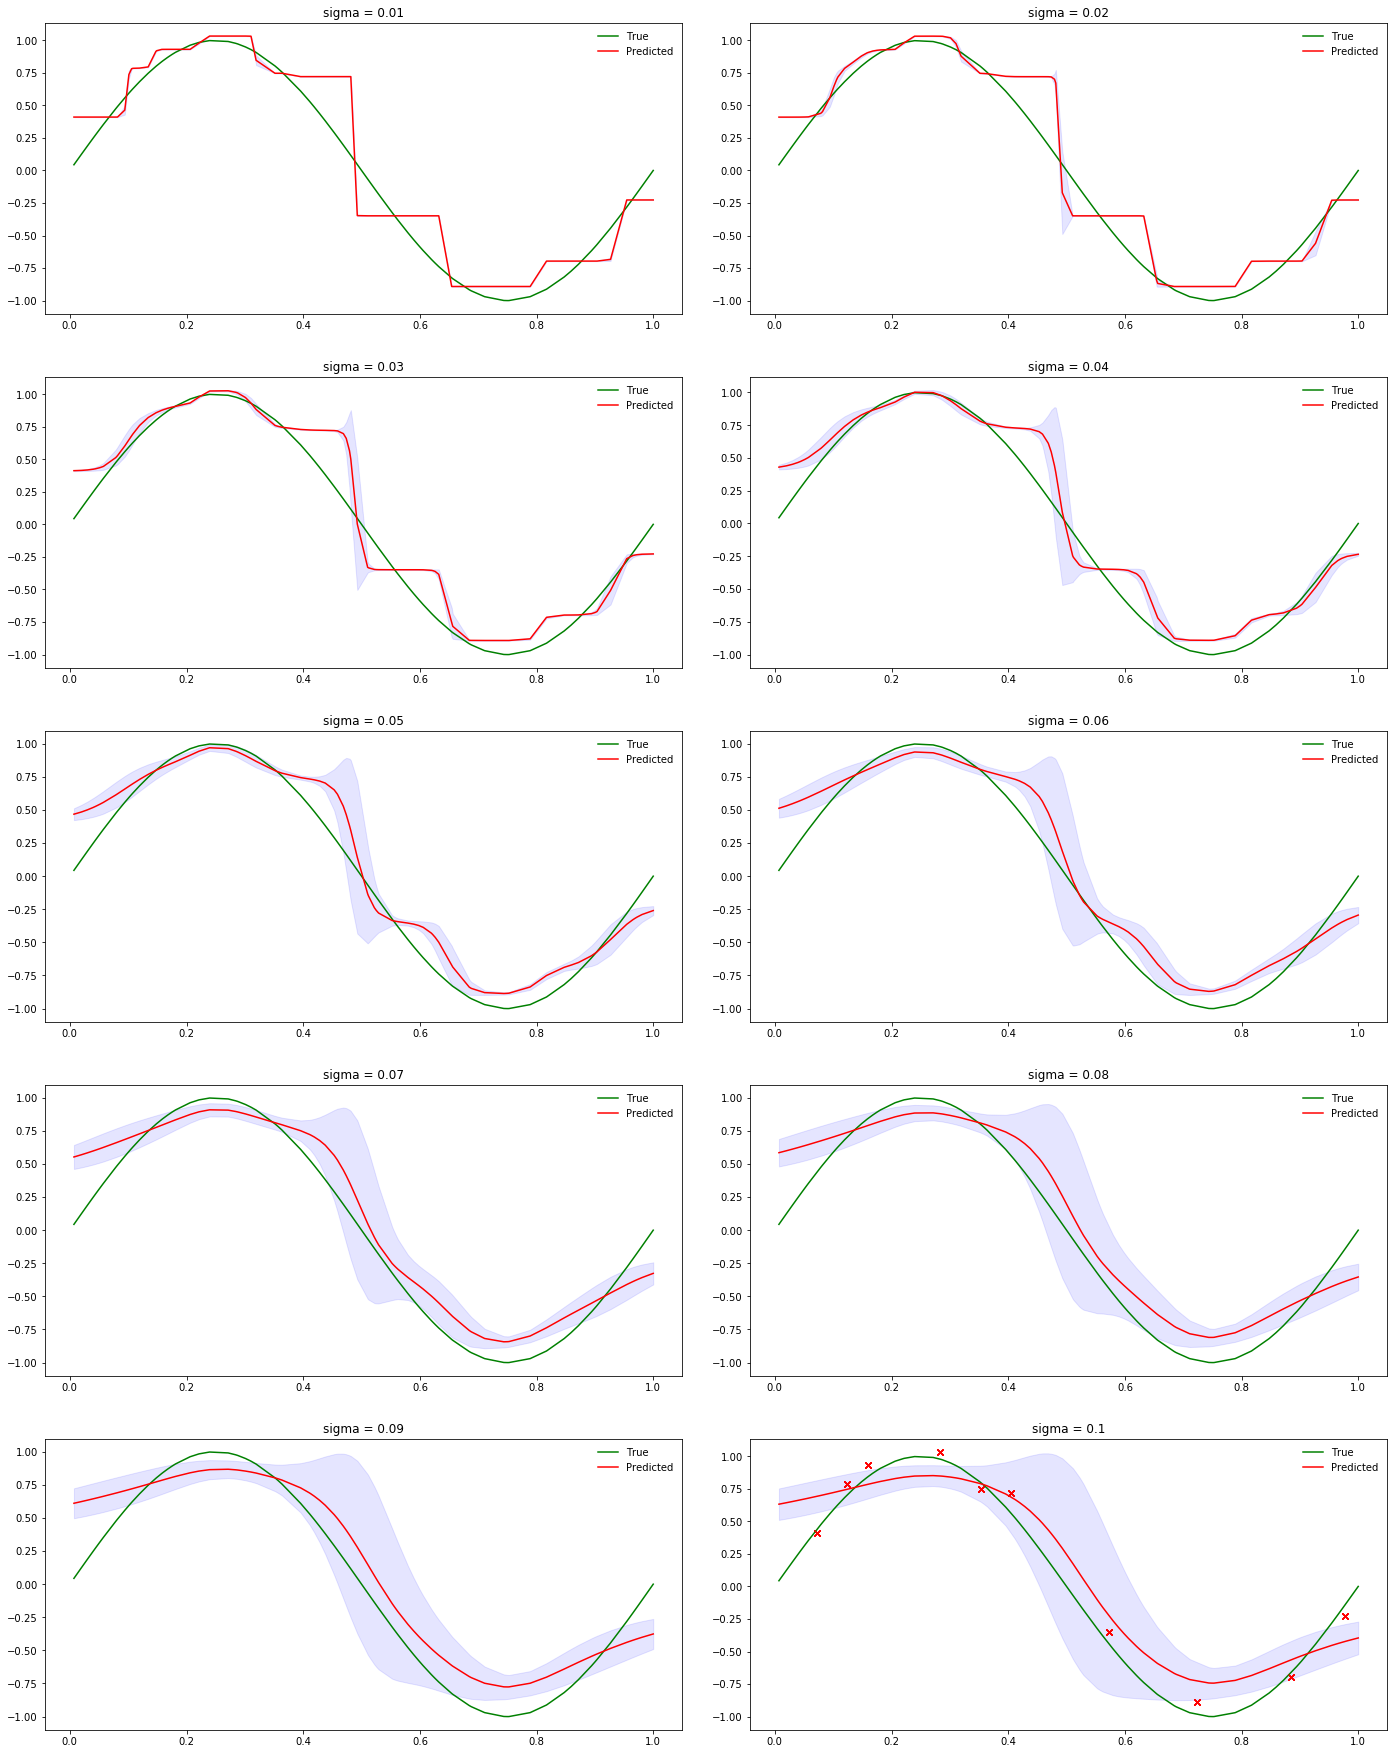

In [414]:
 def get_predicted(x_i, y_i, x_test, y_test, var):
    y_predicted = []
    variance_list = []
    for i in range(len(x_test)):
        kernels = k(x_test[i], x_i, var)
        expectation, variance = get_expectation_and_variance(kernels, y_i, math.sqrt(var))
        y_predicted.append(expectation)
        variance_list.append(variance)
    return y_predicted, variance_list

sigma_list = [0.01*i for i in range(1, 11)]
vars = [sigma**2 for sigma in sigma_list]

fig,axs = plt.subplots(5,2)
counter = 0
for var in vars:
    y_predicted, variance_list = get_predicted(x_i, y_i, x_test, y_test, var)
    plot_function(x_i, y_i, x_test, y_predicted, variance_list, counter, axs, 'sigma = ' + str(sigma_list[counter]))
    counter += 1
fig.set_figheight(25)
fig.set_figwidth(20) 
fig.tight_layout(pad=3)
plt.savefig("kernel_regression.png")